# Fracción de galaxias por host envioroment

- Selecciono las galaxias usando el corte de magnitud. 
- Observo la cantidad de pasivas en cada host usando la etiqueta hecha por anto.
- Luego hago un match con el data set que tiene la etiqueta del host enviorment
- Luego hago un group_by por host environment. 

# EARLY

**Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter
import numpy as np
from itertools import cycle, islice
import scipy.stats as st



%matplotlib inline

**Funtions**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

### Galaxias en GC

**Load**

In [3]:
path_gal_gru = '../../data/tab_gal_gru.dat'
#path_gal_gru = '/home/vanessa/Escritorio/Doctorado/anto_gitano_vane/cg_environments/data/tab_gal_gru.dat'

df = pd.read_table(path_gal_gru, sep="\s+", names=['ngc', 'nk', 'alg', 'delg', 'zred', 'rmag', 'gmag', 'umag', 'gal_ID', 'r50', 'r90', 'r_abs', 'g_abs', 'u_abs', 'pasiva', 'early' ])
def entero(x):
    return int(x)
df['ngc'] = df['ngc'].apply(entero)
id_gc_gal_grup = df.ngc.to_list()
display(df.shape)

path = '../../data/compact_in_all'

df1 = pd.read_table(path, sep="\s+", names=['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b', 'flag',
'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target'])
id_gc_class = df1.i_gru.to_list()

(2070, 16)

In [4]:
df.head(2)

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early
0,1,1,114.844,45.118,0.079785,14.719,15.661,18.91,1237663786878238968,6.580098,20.917290,-22.38191,-21.56168,-19.65829,1,1
1,1,2,114.840,45.124,0.077575,16.380,16.885,18.36,1237663786878238970,2.361705,5.640143,-20.61242,-20.12822,-18.97008,0,0


In [5]:
df1.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,2,4,116.577,22.020,0.046817,4.090,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose
1,4,5,117.794,50.217,0.021810,5.095,23.789,409.803,12.839,0,-21.235,0.055581,0.012300,48.176819,-21.207,Loose


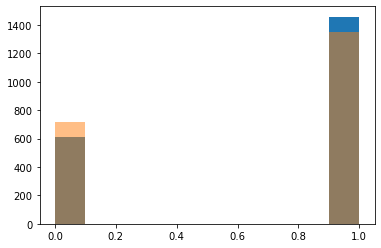

In [6]:
plt.hist(df.pasiva)
plt.hist(df.early, alpha=0.5)
plt.show()

**Lista de GCs descartandos por corte de Magnitud**

In [7]:
diferencia = diff(id_gc_class, id_gc_gal_grup)
df = df.set_index('ngc').drop(diferencia)

**Cantidad de pasivas por grupo**

In [8]:
df_pasivas = df.groupby(["ngc"])["early"].sum()

In [9]:
len(df_pasivas.values)

449

In [10]:
df_pasivas = df_pasivas.reset_index()
df_pasivas.head(2)

,ngc,early
0,1,2
1,2,3


**Match**

In [11]:
df1_sort = df1.sort_values('i_gru', ignore_index=True).copy()
df_pasivas_sort = df_pasivas.sort_values('ngc', ignore_index=True).copy()

In [12]:
df1_sort.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,1,4,114.842,45.103,0.078292,2.62,25.018,348.679,14.719,0,-22.375,0.143311,0.037275,87.756599,-20.608,Field
1,2,4,116.577,22.020,0.046817,4.09,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose


In [13]:
df_final = df1_sort.join(df_pasivas_sort)

In [14]:
df_final.shape

(449, 18)

In [15]:
df_final.tail()

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target,ngc,early
444,458,7,243.981,38.537,0.034782,6.091,26.202,138.779,14.577,1,-20.570,0.103047,0.067340,91.589798,-20.088,Field,458,4
445,459,4,244.410,50.641,0.041362,4.748,25.610,552.432,14.146,1,-21.441,0.099180,0.016282,84.761040,-20.121,Loose,459,3
446,460,5,245.283,13.159,0.034352,3.715,24.912,247.585,14.328,1,-20.778,0.079042,0.028953,55.171383,-19.839,Loose,460,4
447,461,4,247.547,36.247,0.075265,3.671,25.664,383.398,14.479,1,-22.477,0.160493,0.037964,118.280334,-20.026,Field,461,3
448,462,5,250.332,13.424,0.050796,4.130,24.858,268.188,13.764,1,-22.276,0.112063,0.037895,90.346329,-21.427,Loose,462,4


In [16]:
df_final.columns

Index(['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b',
       'flag', 'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target', 'ngc',
       'early'],
      dtype='object')

**group_by  host environmen**

In [17]:
pasivas_env = df_final.groupby('Target')['early'].sum()
pasivas_env

Target
FIl      137
Field    522
Loose    445
Node     149
VoiR      23
VoiS      49
Name: early, dtype: int64

In [18]:
gxs_env = df_final.groupby('Target')['n_m'].sum()
gxs_env 

Target
FIl      200
Field    851
Loose    622
Node     205
VoiR      39
VoiS      95
Name: n_m, dtype: int64

**Fracción  de galaxias por entorno**

In [19]:
frecuencia = []
for i in range(len(gxs_env)):
    frac = pasivas_env[i]/gxs_env[i]
    frecuencia.append(frac)

**Gráfico 7 - panel superior**

In [20]:
frec = [frecuencia[3], frecuencia[2], frecuencia[0], frecuencia[1], frecuencia[5], frecuencia[4]]
print(frec)
X = ['Node', 'Loose', 'FIl', 'Field', 'VoidS', 'VoidR']
print(X)

[0.7268292682926829, 0.7154340836012861, 0.685, 0.6133960047003525, 0.5157894736842106, 0.5897435897435898]
['Node', 'Loose', 'FIl', 'Field', 'VoidS', 'VoidR']


**barras de error**

Para su calculo tomo la distribución de galaxias pasivas en cada entorno. 
Por lo tanto, tomo el df y le agrego una etiqueta de env para tomar todo el conjunto de galaxias en ese entono. 

In [21]:
df = df.reset_index()

In [22]:
Target = []

for i in range(df.shape[0]):
    for j in range(df1_sort.shape[0]):
        if (df.ngc.iloc[i] == df1_sort.i_gru.iloc[j]):
            Target.append(df1_sort.Target.iloc[j])
            

In [23]:
df['Target'] = Target

**NOTA:** En nuestro caso como uno de los valores es cero en el gráfico de barras, la media coincide con la fracción de pasivas. 

In [24]:
import numpy as np
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats

In [25]:
def estimador_env(data, test_statistic):    
    estimate, bias, stderr, conf_interval = jackknife_stats(
    data, test_statistic, 0.95)
    
    return(estimate, bias, stderr, conf_interval)

In [26]:
frac = np.mean

In [27]:
e = []

**NODE**

'estimador'

0.8536585365853658

'stderr'

0.02474632469248247

'conf_interval'

array([0.80515663, 0.90216044])

'conf_interval_bernoulli'

0.06287661356608193

'conf_interval_jackknife'

0.048501905146999924

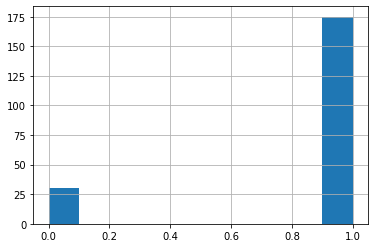

In [28]:
gxs_Node = df[df['Target'] == 'Node']
gxs_Node.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_Node.pasiva.hist()
gxs_Node.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_Node.pasiva.values, frac)
display('estimador', estimate)
display('stderr', stderr)
display('conf_interval', conf_interval)

display('conf_interval_bernoulli', 0.06287661356608193)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**LOOSE**

0.017357537195860594

'conf_interval_jackknife'

0.03402014776420115

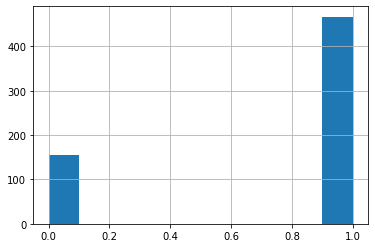

In [29]:
gxs_Loose = df[df['Target'] == 'Loose']
gxs_Loose.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_Loose.pasiva.hist()
gxs_Loose.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_Loose.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**FILL**

0.030695456590127308

'conf_interval_jackknife'

0.0601619894056622

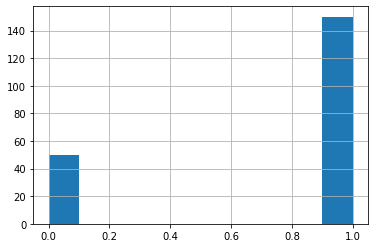

In [30]:
gxs_FIl = df[df['Target'] == 'FIl']
gxs_FIl.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_FIl.pasiva.hist()
gxs_FIl.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_FIl.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**FIELD**

0.016517261763429845

'conf_interval_jackknife'

0.032373238179543073

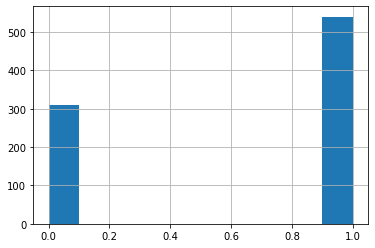

In [31]:
gxs_Field = df[df['Target'] == 'Field']
gxs_Field.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_Field.pasiva.hist()
gxs_Field.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_Field.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**VoiR**

0.07647191129018716

'conf_interval_jackknife'

0.1498821919577088

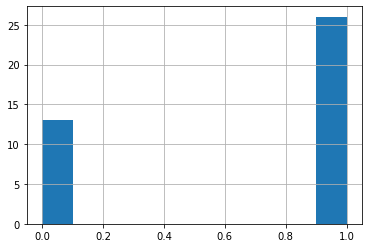

In [32]:
gxs_VoiR = df[df['Target'] == 'VoiR']
gxs_VoiR.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_VoiR.pasiva.hist()
gxs_VoiR.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_VoiR.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

**VoiS**

0.049444369576282364

'conf_interval_jackknife'

0.09690918360780143

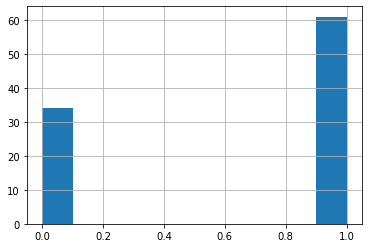

In [33]:
gxs_VoiS = df[df['Target'] == 'VoiS']
gxs_VoiS.shape #coincide con lo hecho anteriormente
# distribución de la variable discreta pasiva
gxs_VoiS.pasiva.hist()
gxs_VoiS.pasiva.mean()
estimate, bias, stderr, conf_interval = estimador_env(gxs_VoiS.pasiva.values, frac)
display(stderr)
ci = abs(estimate - conf_interval[0])
display('conf_interval_jackknife', abs(estimate - conf_interval[0]))
e.append(ci)

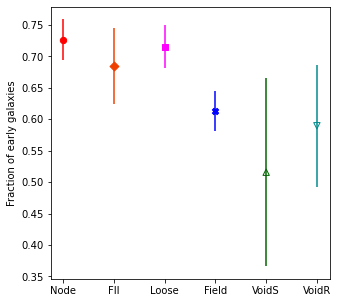

In [34]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], frec[0], marker='o', s=40, color='r')
plt.scatter(X[2], frec[2], marker='D', s=40, color= "#EE4000")
plt.scatter(X[1], frec[1], marker='s', s=40, color="Magenta")
plt.scatter(X[3], frec[3], marker='X', s=40, color='blue')
plt.scatter(X[4], frec[4], marker='^', s=40, facecolors='none', edgecolors= '#006400')
plt.scatter(X[5], frec[5], marker='v', s=40, facecolors='none', edgecolors='#008B8B')

plt.errorbar(0, frec[0], yerr=0.03215843597706181, color='r')
plt.errorbar(1, frec[2], yerr=e[2], color=  "#EE4000")
plt.errorbar(2, frec[1], yerr=e[1], color= "Magenta")
plt.errorbar(3, frec[3], yerr=e[3], color= 'blue')
plt.errorbar(4, frec[4], yerr=e[4], color= '#006400')
plt.errorbar(5, frec[5], yerr=e[5], color= '#008B8B')

plt.ylabel('Fraction of early galaxies')
plt.savefig('FracGxEarly.eps',format='eps')